## Importing libraries

In [1]:
import pandas as pd
import numpy as np

## Reading Datasets

In [2]:
data=pd.read_csv('train.csv')
center=pd.read_csv('fulfilment_center_info.csv')
meal=pd.read_csv('meal_info.csv')
test=pd.read_csv('test.csv')

In [3]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
data.shape

(456548, 9)

In [8]:
center.shape

(77, 5)

In [9]:
meal.shape

(51, 3)

In [10]:
test.shape

(32573, 8)

## Reading and merging datasets.

In [11]:
data=pd.concat([data,test],axis=0)

In [12]:
data=data.merge(center,on='center_id',how='left')

In [13]:
data=data.merge(meal,on='meal_id',how='left')

In [14]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian


## Descriptive Statistics

In [15]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.891210e+05,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,456548.000000,489121.000000,489121.000000,489121.000000
mean,1.249988e+06,79.810613,82.092206,2024.852268,332.879277,354.312259,0.080172,0.107346,261.872760,601.551172,56.621065,4.083865
std,1.443421e+05,44.343325,45.973390,547.408978,153.022073,160.352168,0.271560,0.309552,395.922798,66.182598,17.641296,1.092163
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000
25%,1.124937e+06,42.000000,43.000000,1558.000000,228.010000,243.500000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000
50%,1.249977e+06,81.000000,76.000000,1993.000000,299.760000,311.430000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000
75%,1.374988e+06,118.000000,110.000000,2539.000000,445.230000,458.810000,0.000000,0.000000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


## checking null values

In [16]:
data.isnull().any()

id                       False
week                     False
center_id                False
meal_id                  False
checkout_price           False
base_price               False
emailer_for_promotion    False
homepage_featured        False
num_orders                True
city_code                False
region_code              False
center_type              False
op_area                  False
category                 False
cuisine                  False
dtype: bool

In [17]:
data.num_orders.fillna(data.num_orders.mean(),inplace=True)

In [18]:
data.isnull().any()

id                       False
week                     False
center_id                False
meal_id                  False
checkout_price           False
base_price               False
emailer_for_promotion    False
homepage_featured        False
num_orders               False
city_code                False
region_code              False
center_type              False
op_area                  False
category                 False
cuisine                  False
dtype: bool

## Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
data.center_type=le.fit_transform(data.center_type)
data.category=le.fit_transform(data.category)
data.cuisine=le.fit_transform(data.cuisine)

In [22]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,2,2.0,0,3
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,2,2.0,0,3
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,2,2.0,0,3
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,2,2.0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,2,2.0,0,1


## dropping columns

In [29]:
trainfinal = data.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,136.83,152.29,0,0,177.0,647,56,2,2.0,0,3
1,1466964,1,136.83,135.83,0,0,270.0,647,56,2,2.0,0,3
2,1346989,1,134.86,135.86,0,0,189.0,647,56,2,2.0,0,3
3,1338232,1,339.50,437.53,0,0,54.0,647,56,2,2.0,0,1
4,1448490,1,243.50,242.50,0,0,40.0,647,56,2,2.0,0,1


In [30]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine']


In [31]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'center_type', 'op_area', 'category', 'cuisine', 'city_code', 'region_code', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [32]:
trainfinal = trainfinal[cols]
trainfinal.head()

,id,week,center_type,op_area,category,cuisine,city_code,region_code,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,2,2.0,0,3,647,56,136.83,152.29,0,0,177.0
1,1466964,1,2,2.0,0,3,647,56,136.83,135.83,0,0,270.0
2,1346989,1,2,2.0,0,3,647,56,134.86,135.86,0,0,189.0
3,1338232,1,2,2.0,0,1,647,56,339.50,437.53,0,0,54.0
4,1448490,1,2,2.0,0,1,647,56,243.50,242.50,0,0,40.0


In [33]:
trainfinal.dtypes

id                         int64
week                       int64
center_type                int32
op_area                  float64
category                   int32
cuisine                    int32
city_code                  int64
region_code                int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders               float64
dtype: object

## Data visualizations

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'num_orders Distribution')

<Figure size 864x504 with 0 Axes>

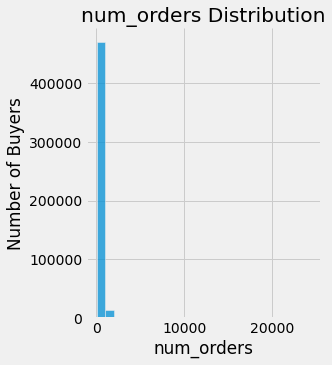

In [35]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
sns.displot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")


In [38]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

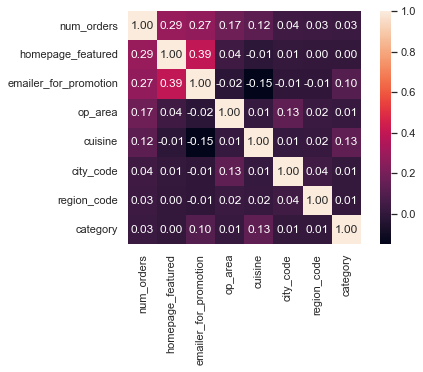

In [39]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale = 1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, 
                      fmt='.2f', yticklabels=columns.values, 
                      xticklabels=columns.values)
plt.show()

## splitting datas into dependent and independent variables

In [40]:
X=data.drop(columns=['num_orders'],axis=1)
X.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,647,56,2,2.0,0,3
1,1466964,1,55,1993,136.83,135.83,0,0,647,56,2,2.0,0,3
2,1346989,1,55,2539,134.86,135.86,0,0,647,56,2,2.0,0,3
3,1338232,1,55,2139,339.50,437.53,0,0,647,56,2,2.0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,647,56,2,2.0,0,1


In [41]:
y=data['num_orders']
y.head()

0    177.0
1    270.0
2    189.0
3     54.0
4     40.0
Name: num_orders, dtype: float64

## splitting the dataset into trainset and testset 

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [43]:
X_train.shape

(342384, 14)

In [44]:
X_test.shape

(146737, 14)

In [45]:
y_train.shape

(342384,)

In [46]:
y_test.shape

(146737,)